# Sparse Sensor Placement Optimization for Classification (SSPOC)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics

import pysensors as ps

## Binary classification (LDA)

In [18]:
digits = datasets.load_digits(n_class=2)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
print(n_samples, n_features)

360 64


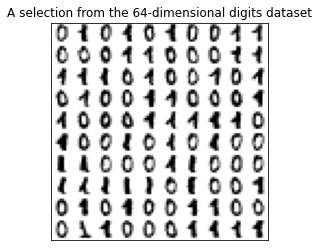

In [19]:
# Plot some digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [20]:
model = ps.SSPOC(threshold=2)
model.fit(X, y)

/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:390: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


SSPOC(basis=Identity(n_basis_modes=360),
      classifier=LinearDiscriminantAnalysis(), threshold=2)

In [23]:
print('Portion of sensors used:', len(model.selected_sensors) / 64)
print('Selected sensors:', model.selected_sensors)

Portion of sensors used: 0.09375
Selected sensors: [ 6 14 16 24 28 57]


Text(0.5, 1.0, 'Coefficient magnitudes')

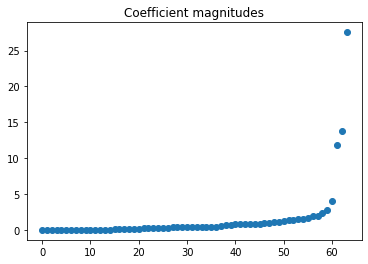

In [22]:
plt.plot(np.sort(np.abs(model.sensor_coef_)), 'o')
plt.title('Coefficient magnitudes');

In [24]:
y_pred = model.predict(X[:, model.selected_sensors])
print('Incorrect classifications:', sum(np.abs(y - y_pred)), 'out of', len(y))
print('Accuracy:', metrics.accuracy_score(y, y_pred))

Incorrect classifications: 12 out of 360
Accuracy: 0.9666666666666667


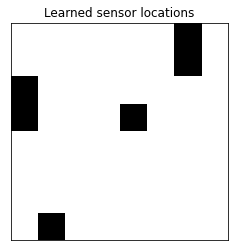

In [54]:
# Plot sensor locations
img = np.zeros(64)
img[model.selected_sensors] = 16

plt.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Learned sensor locations')
plt.show()

## Multiclass classification (LDA)

In [42]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
print(n_samples, n_features)

1797 64


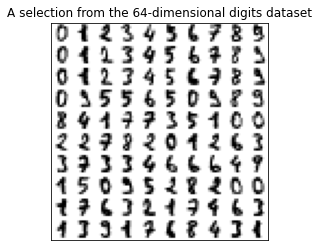

In [43]:
# Plot some digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [39]:
threshold = 0.1
l1_penalty = 0.01
model = ps.SSPOC(threshold=threshold, l1_penalty=l1_penalty)
model.fit(X, y)

print('Portion of sensors used:', len(model.selected_sensors) / 64)
print('Selected sensors:', model.selected_sensors)

Portion of sensors used: 0.765625
Selected sensors: [ 1  2  3  4  5  6  9 11 13 14 16 17 18 19 20 21 22 24 25 26 27 28 29 30
 33 34 35 36 37 38 41 42 43 44 45 46 49 51 52 53 54 55 57 58 59 60 61 62
 63]


/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/sklearn/linear_model/_omp.py:390: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


In [8]:
# Check accuracy on training set
y_pred = model.predict(X[:, model.selected_sensors])
print('Accuracy:', metrics.accuracy_score(y, y_pred))

Accuracy: 0.8458542014468559


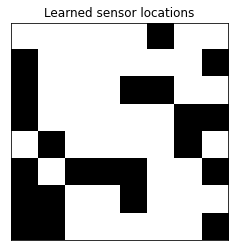

In [9]:
# Plot sensor locations
img = np.zeros(64)
img[model.selected_sensors] = 16

plt.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Learned sensor locations')
plt.show()

Classification report for classifier SSPOC(basis=Identity(n_basis_modes=1797),
      classifier=LinearDiscriminantAnalysis(), l1_penalty=0.01, threshold=0.1):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       178
           1       0.64      0.68      0.66       182
           2       0.78      0.74      0.76       177
           3       0.73      0.84      0.78       183
           4       0.92      0.90      0.91       181
           5       0.92      0.92      0.92       182
           6       0.98      0.97      0.97       181
           7       0.92      0.88      0.90       179
           8       0.77      0.76      0.77       174
           9       0.88      0.80      0.84       180

    accuracy                           0.85      1797
   macro avg       0.85      0.85      0.85      1797
weighted avg       0.85      0.85      0.85      1797


Confusion matrix:
[[172   0   0   0   2   2   0   0   2   0]
 [  0 124  22  20   

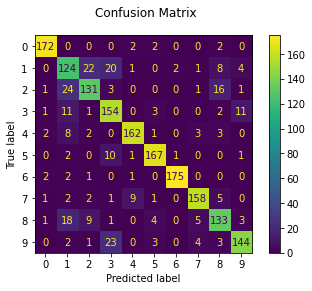

In [14]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y, y_pred)))
disp = metrics.plot_confusion_matrix(model.classifier, X[:, model.selected_sensors], y)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


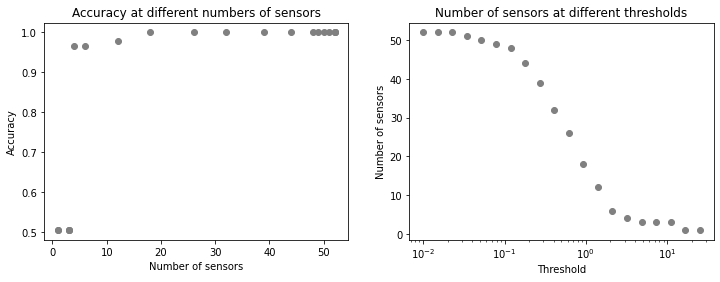

In [38]:
# TODO: plot accuracy vs threshold
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for thresh in np.logspace(-2, 1.4, 20):
    model.update_threshold(thresh, xy=(X, y))
    y_pred = model.predict(X[:, model.selected_sensors])
    acc = metrics.accuracy_score(y, y_pred)
    axs[0].plot(len(model.selected_sensors), acc, '-o', color='gray')
    axs[1].plot(thresh, len(model.selected_sensors), '-o', color='gray')
    
axs[0].set(xlabel='Number of sensors', ylabel='Accuracy', title='Accuracy at different numbers of sensors')
axs[1].set(xlabel='Threshold', xscale='log', ylabel='Number of sensors', title='Number of sensors at different thresholds')

fig.show()

## Other classifiers

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

In [62]:
classifiers = [
    ('Ridge', RidgeClassifier(alpha=0.01)),
    ('Perceptron', Perceptron(penalty='elasticnet', alpha=0.1)),
    ('Logistic regression', LogisticRegression(C=10, max_iter=500, tol=1e-3)),
    ('SGD', SGDClassifier(max_iter=5000)),
]

for classifier in classifiers:
    print('----------------------------------------------------')
    print(classifier[0])
    print('----------------------------------------------------')
    
    model = ps.SSPOC(classifier=classifier[1], threshold=threshold, l1_penalty=l1_penalty)
    model.fit(X, y)

    print('Portion of sensors used:', len(model.selected_sensors) / 64)
    print('Selected sensors:', model.selected_sensors)

    # Check accuracy on training set
    y_pred = model.predict(X[:, model.selected_sensors])
    print('Accuracy:', metrics.accuracy_score(y, y_pred), '\n\n')

----------------------------------------------------
Ridge
----------------------------------------------------
Portion of sensors used: 0.015625
Selected sensors: [56]
Accuracy: 0.10239287701725097 


----------------------------------------------------
Perceptron
----------------------------------------------------
Portion of sensors used: 0.71875
Selected sensors: [ 2  3  4  5  9 10 11 12 13 14 17 18 19 20 21 22 25 26 27 28 29 30 33 34
 35 36 37 38 41 42 43 44 45 46 49 50 51 52 54 55 58 59 60 61 62 63]
Accuracy: 0.17250973845297718 


----------------------------------------------------
Logistic regression
----------------------------------------------------


/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also ref

Portion of sensors used: 0.140625
Selected sensors: [20 21 27 28 33 36 42 43 44]
Accuracy: 0.8330550918196995 


----------------------------------------------------
SGD
----------------------------------------------------
Portion of sensors used: 1.0
Selected sensors: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Accuracy: 0.9682804674457429 




## Other bases

In [45]:
n_basis_modes = 32
bases = [
    ('Identity', ps.basis.Identity(n_basis_modes=n_basis_modes)),
    ('Random projection', ps.basis.RandomProjection(n_basis_modes=n_basis_modes)),
    ('POD', ps.basis.POD(n_basis_modes=n_basis_modes)),
    
]

for basis in bases:
    print('----------------------------------------------------')
    print(basis[0])
    print('----------------------------------------------------')
    
    model = ps.SSPOC(basis=basis[1], threshold=threshold, l1_penalty=l1_penalty)
    model.fit(X, y)

    print('Portion of sensors used:', len(model.selected_sensors) / 64)
    print('Selected sensors:', model.selected_sensors)

    # Check accuracy on training set
    y_pred = model.predict(X[:, model.selected_sensors])
    print('Accuracy:', metrics.accuracy_score(y, y_pred), '\n\n')

----------------------------------------------------
Identity
----------------------------------------------------
Portion of sensors used: 0.34375
Selected sensors: [ 5  8 15 16 20 21 24 30 31 33 38 40 42 43 44 47 48 49 52 56 57 63]
Accuracy: 0.8458542014468559 


----------------------------------------------------
Random projection
----------------------------------------------------


/home/brian/Documents/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/basis/_identity.py:71: UserWarning: Only the first 32 examples were retained.
  warn(f"Only the first {self.n_basis_modes} examples were retained.")


ValueError: shapes (1797,64) and (1797,32) not aligned: 64 (dim 1) != 1797 (dim 0)